In [1]:
import numpy as np

In [2]:
class SVM:
    def __init__(self, lr=0.01,toler=0.001, C=100, itr=500):
        self.lr = lr
        self.C = C
        self.itr = itr
        self.toler=toler
        self.W=None
        self.b=None
        self.cost_hist=[]
    
    def predict(self,X):
        pre = np.dot(X,self.W)+self.b
        return np.sign(pre)
        
        
    def fit(self,X,y):
        s,f=X.shape
        
        y=np.where(y<=0,-1,1)
        
        self.W=np.zeros(f)
        self.b=0
        
        pCost = float('inf')
        
        for _ in range(self.itr):
            tloss =0
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.W) - self.b) >= 1  
                
                hinge= max(0, 1 - y[idx] * (np.dot(x_i, self.W) - self.b))
                tloss += hinge
    
                if condition:
                    self.W -= self.lr * (2 / self.C * self.W)
                else:
                    self.W -= self.lr * (2 / self.C * self.W - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]
                    
            reg = 0.5* np.dot(self.W, self.W)  # L2 regularization term
            cost = reg +(1/self.C) *tloss
            self.cost_hist.append(cost)
            if (abs(pCost - cost)<self.toler):
                break
            pCost = cost
                    
                
    def evaluate(self, y, p):
        p = np.where(p == -1, 0, p)

        t_pos = np.sum((y == 1) & (p == 1))
        f_pos = np.sum((y != p) & (p == 1))
        t_neg = np.sum((y == p) & (p == 0))
        f_neg = np.sum((y != p) & (p == 0))

        accuracy=round((np.sum((y==p))/len(y)),4)
        precision=round((t_pos/(t_pos+f_pos) if (t_pos+f_pos)!=0 else 0),4)
        recall=round((t_pos/(t_pos+f_neg) if(t_pos+f_neg)!=0 else 0),4)
        f1score=round((2*(precision*recall)/(precision+recall) if(precision+recall)!=0 else 0),4)

        print(f'Accuracy: {accuracy}')
        print(f'F1-Score: {f1score} (Precision: {precision}, Recall: {recall})')
        
        cm = np.array([[t_neg, f_pos], [f_neg, t_pos]])
        plt.figure(figsize=(2, 2))
        sns.heatmap(cm, annot=True, cmap="BuPu",cbar=False)
        plt.title('SVM Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()


In [3]:
import math
def Mlog(x):
        for k in x:
            k=math.log(k)
        return x
    
def binary(x):
        thresh = 0.5
        result = np.where(x < thresh, 0, 1)
        return result

In [4]:
class LogReg:
    def __init__(self, lr =0.01, toler = 0.001, itr = 100):
        self.lr = lr
        self.toler = toler
        self.itr = itr
        self.W = None
        self.b = None
        self.cost_hist = []
        
        
    def predict(self,X):
        e=2.71828
        temp=np.dot(X,self.W)+self.b
        predictions=1/(1+e**(-(temp)))
        return predictions
    
    
    def fit(self,X,y):
        s,f =X.shape
        self.W = np.zeros(f)
        self.b=0
        pCost = float('inf')
        
        for _ in range(self.itr):
            preds=self.predict(X)
            err = preds - y

            dW = 1/s* np.dot(X.T, err)
            db = 1/s*np.sum(err)

            self.W-=self.lr*dW
            self.b-=self.lr*db
        
            cost = -np.mean(y * (Mlog(preds)) + (1 - y) * (Mlog((1 - preds))))
            self.cost_hist.append(cost)
            if (abs(pCost - cost)<self.toler):
                break
            pCost = cost
            
            
    def evaluate(self, y, p):
        
        t_pos = np.sum((y == 1) & (p == 1))
        f_pos = np.sum((y != p) & (p == 1))
        t_neg = np.sum((y == p) & (p == 0))
        f_neg = np.sum((y != p) & (p == 0))

        accuracy=round((np.sum((y==p))/len(y)),4)
        precision=round((t_pos/(t_pos+f_pos) if (t_pos+f_pos)!=0 else 0),4)
        recall=round((t_pos/(t_pos+f_neg) if(t_pos+f_neg)!=0 else 0),4)
        f1score=round((2*(precision*recall)/(precision+recall) if(precision+recall)!=0 else 0),4)

        print(f'Accuracy: {accuracy}')
        print(f'F1-Score: {f1score} (Precision: {precision}, Recall: {recall})')
        
        cm = np.array([[t_neg, f_pos], [f_neg, t_pos]])
        plt.figure(figsize=(2, 2))
        sns.heatmap(cm, annot=True, cmap="BuPu",cbar=False)
        plt.title('Log-Reg Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        

In [5]:
import pandas as pd
db = pd.read_csv("./titanic.csv", index_col = 'PassengerId')

db['Sex']=db['Sex'].map({'male':0,'female':1})

db=db.drop(['Name','Cabin','Ticket'],axis=1)

db['Embarked']=db['Embarked'].map({'S':0,'C':1,'Q':2})
db['Embarked']=db['Embarked'].fillna(db['Embarked'].median())

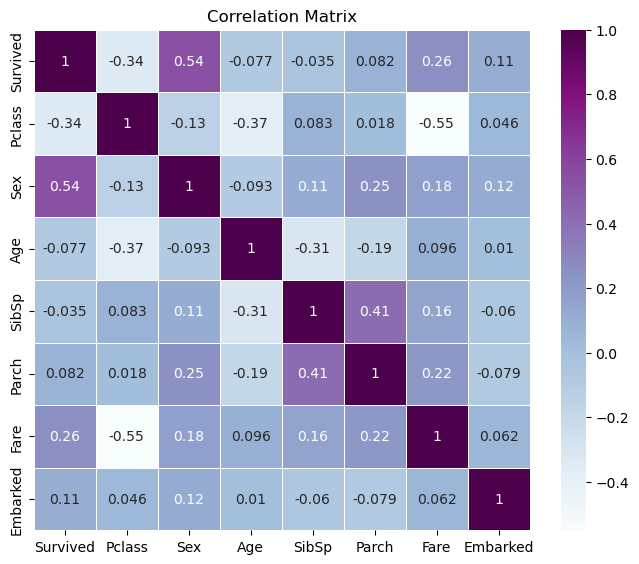

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
c_mat=db.corr()
plt.figure(figsize=(8,6.5))
sns.heatmap(c_mat, annot=True, cmap='BuPu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
db=db.drop(['Age','Parch'],axis=1)

In [8]:
X=db.drop("Survived", axis=1)
y=db.Survived
X=X.to_numpy()
y=y.to_numpy()

In [9]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X-X_mean)
X=X/X_std

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
svm=SVM(0.001,0.00001,10,100)
log = LogReg(0.001,0.000001,100000)
log.fit(X_train,y_train)
svm.fit(X_train,y_train)

res1=svm.predict(X_test)
res2 = log.predict(X_test)
res2=binary(res2)
print('Logistic Regression:')
log.evaluate(y_test,res2)
print()
print('SVM:')
svm.evaluate(y_test,res1)

#Precision focuses on the accuracy of the positive predictions.
#Recall measures the model's ability to capture all positive instances.
#F1 provides a combines recall and precision and is a balance between both.

In [ ]:
plt.plot(range(len(log.cost_hist)),log.cost_hist)
plt.title('Logistic Regression')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

plt.plot(range(len(svm.cost_hist)),svm.cost_hist)
plt.title('SVM')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()